# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Richelle Vania Thionanda
- **Email:** mc172d5x1392@student.devacademy.id
- **ID Dicoding:** MC172D5X1392

## Menentukan Pertanyaan Bisnis

####  Membuat Prediksi
- Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda, pada hari kerja dan hari libur?
 
#### Menemukan pola
- Bagaimana tren penyewaan sepeda setiap bulan?

## Import Semua Packages/Library yang Digunakan

In [468]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [469]:
#Membuat tabel day
day_df = pd.read_csv(r"C:\Submission\Data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [470]:
#Membuat tabel hour
hour_df = pd.read_csv(r"C:\Submission\Data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tabel day_df: Jumlah total penyewa sepeda (cnt) pada 5 hari pertama di dataset (day_df) relatif rendah, dengan nilai tertinggi sekitar 1600, kemungkinan karena masih awal tahun (Januari).
- Tabel hour_df: Pada tabel hour_df, terlihat bahwa jumlah penyewa sepeda (cnt) pada jam-jam awal (0-4) di hari pertama sangat rendah, dengan nilai tertinggi hanya 40, yang wajar karena merupakan jam malam.

### Assessing Data

In [471]:
#Menilai Data Day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [472]:
# Menilai Data Hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset day_df tidak memiliki missing value, karena semua kolom memiliki jumlah Non-Null Count yang sama dengan jumlah entries yaitu 731. Hal ini menunjukkan bahwa data sudah lengkap dan tidak ada data yang hilang. 
- Dataset hour_df tidak memiliki missing value, karena semua kolom memiliki jumlah Non-Null Count yang sama dengan jumlah entries yaitu 17379. Hal ini menandakan bahwa kualitas data pada dataset hour_df cukup baik dari sisi kelengkapan data.
- Pada kolom dteday baik pada data day_df dan hour_df akan merepresentasikan tanggal. Tipe data object biasanya digunakan untuk string atau tipe data campuran. Akan lebih ideal jika kolom dteday memiliki tipe data datetime64.

In [473]:
# Missing Value Day
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [474]:
# Missing Value Hour
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Dataset day_df tidak memiliki missing value, karena jumlah nilai NaN pada setiap kolom adalah 0. Hal ini menunjukkan bahwa kualitas data pada dataset day_df cukup baik dari sisi kelengkapan data.
- Dataset hour_df tidak memiliki missing value, karena hasil perhitungan isna().sum() untuk setiap kolom adalah 0. Hal ini menandakan bahwa dataset hour_df sudah bersih dari data kosong atau hilang.

In [475]:
# Duplikasi Data Day
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [476]:
# Duplikasi Data Hour
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi data pada dataset day_df: Hasil pengecekan menunjukkan bahwa tidak ditemukan baris yang identik atau duplikat dalam dataset day_df.
- Tidak ada duplikasi data pada dataset hour_df: Dataset hour_df juga bebas dari duplikasi data, yang mengindikasikan bahwa tidak ada entri data yang tercatat ganda.

In [477]:
# Ringkasan Parameter Statistik Day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [478]:
# Ringkasan Parameter Statistik Hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Rata-rata jumlah pengguna sepeda per hari adalah 4.504, dengan pengguna terdaftar (registered) lebih dominan dibandingkan pengguna kasual (casual). Ini menunjukkan bahwa layanan sepeda lebih sering digunakan oleh pelanggan tetap dibandingkan pengguna sesekali.
- Jumlah pengguna sepeda terdaftar (registered) rata-rata 153 per jam, jauh lebih tinggi dibandingkan pengguna kasual (casual) yang hanya sekitar 35 per jam. Hal ini menunjukkan bahwa sebagian besar pengguna layanan sepeda adalah pelanggan tetap yang kemungkinan besar menggunakan layanan ini untuk keperluan rutin seperti bekerja atau sekolah.

### Cleaning Data

In [479]:
# Membersihkan data day 
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [480]:
# Membersihkan data hour 
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom "dteday" berhasil dikonversi ke tipe data datetime64, yang memungkinkan analisis berbasis waktu lebih akurat. Dataset day_df terdiri dari 731 entri dengan 16 kolom tanpa nilai null, menunjukkan bahwa data lengkap.
- Kolom "dteday" pada dataset hour_df berhasil dikonversi ke tipe datetime64, memungkinkan analisis berbasis waktu yang lebih akurat. Dataset ini memiliki 17.379 entri dan 17 kolom, dengan tidak ada nilai null.

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [481]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- day_df.info() menampilkan informasi, yaitu:
   - Jumlah Data: Data terdiri dari 731 baris, mewakili 731 hari.
   - Kolom: Terdapat 16 kolom dengan berbagai tipe data:
   - 1 kolom tanggal (dteday).
   - 4 kolom numerik desimal (temp, atemp, hum, windspeed).
   - 11 kolom numerik bilangan bulat (sisanya).
   - Kelengkapan Data: Tidak ada nilai yang hilang (semua kolom memiliki 731 nilai non-null).
   - Kolom Tanggal: Kolom dteday menunjukkan bahwa data mencakup periode waktu tertentu.
   - Kolom Numerik: Kolom numerik (bilangan bulat dan desimal) kemungkinan besar berisi informasi tentang:
   - Kondisi cuaca (temp, atemp, hum, windspeed, weathersit).
   - Waktu (misalnya, season, yr, mnth, weekday).
   - Informasi penyewaan sepeda (casual, registered, cnt).
   - Data Bersih: Tidak adanya nilai null menunjukkan bahwa data relatif bersih dan siap untuk dianalisis.


In [482]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- day_df.info() menampilkan informasi, yaitu:
   - Rata-rata Penyewaan: Rata-rata penyewaan sepeda per hari adalah 848.18.
   - Variasi Penyewaan: Penyewaan sepeda sangat bervariasi, dari 2 hingga 3410.
   - Suhu Rata-rata: Suhu rata-rata adalah 0.495.
   - Kelembaban Rata-rata: Kelembaban rata-rata adalah 0.628.
   - Kecepatan Angin Rata-rata: Kecepatan angin rata-rata adalah 0.190.
   - Distribusi Musim: Musim terdistribusi cukup merata (rata-rata 2.5 dari 4).
   - Tahun: Data mencakup dua tahun (2011 dan 2012), dengan distribusi yang seimbang.
   - Bulan: Data mencakup semua bulan dalam setahun.
   - Hari Kerja: Sebagian besar hari adalah hari kerja (rata-rata 0.684).
   - Penyewa Kasual (casual): jumlah penyewa kasual bervariasi dari 2 hingga 3410. ata-rata penyewa kasual adalah 848.
   - Penyewa Terdaftar (registered): Jumlah penyewa terdaftar bervariasi dari 20 hingga 6946. Rata-rata penyewa terdaftar adalah 3656.
   - Total Penyewaan (cnt): Total penyewaan bervariasi dari 22 hingga 8714. Rata-rata total penyewaan adalah 4504.
   - Standar Deviasi: Nilai Standar deviasi yang cukup besar pada kolom Casual, Registered dan cnt, menunjukan bahwa nilai data pada kolom tersebut memiliki rentang nilai yang cukup lebar.
   - Perbandingan Penyewa: Jumlah penyewa terdaftar secara signifikan lebih tinggi daripada penyewa kasual, menunjukkan bahwa sebagian besar penyewaan berasal dari pengguna terdaftar.

In [483]:
# Menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca pada hari kerja dan hari libur
cuaca_hari_kerja = day_df[day_df['workingday'] == 1].groupby('weathersit')['cnt'].mean()
cuaca_hari_libur = day_df[day_df['holiday'] == 0].groupby('weathersit')['cnt'].mean()

# Menggabungkan hasil dalam satu DataFrame untuk perbandingan
cuaca_pengaruh_df = pd.DataFrame({
    'Hari Kerja': cuaca_hari_kerja,
    'Hari Libur': cuaca_hari_libur
})

# Menampilkan hasil analisis
print(cuaca_pengaruh_df)


             Hari Kerja   Hari Libur
weathersit                          
1           5023.902280  4905.154018
2           4075.028249  4061.684647
3           1799.500000  1803.285714


**Insight:**
- Cuaca Cerah (weathersit = 1): Cuaca cerah menghasilkan jumlah penyewa sepeda tertinggi, baik pada hari kerja (rata-rata 5023.90 sepeda) maupun hari libur (rata-rata 4905.15 sepeda). Terlihat sedikit lebih banyak penyewaan sepeda pada hari kerja saat cuaca cerah.

- Cuaca Mendung (weathersit = 2): Cuaca mendung menyebabkan penurunan jumlah penyewa sepeda dibandingkan cuaca cerah. Pada hari kerja, rata-rata penyewaan adalah 4075.03 sepeda (penurunan sekitar 19%). Pada hari libur, rata-rata penyewaan adalah 4061.68 sepeda (penurunan sekitar 17%).

- Hujan Ringan (weathersit = 3): Hujan ringan menghasilkan jumlah penyewa sepeda terendah. Pada hari kerja, rata-rata penyewaan adalah 1799.50 sepeda (penurunan sekitar 64% dari cuaca cerah). Pada hari libur, rata-rata penyewaan adalah 1803.29 sepeda (penurunan sekitar 63% dari cuaca cerah). Jumlah penyewaan sepeda saat hujan ringan hanya sekitar 35% dari jumlah penyewaan saat cuaca cerah.

In [484]:
# Menampilkan tren penyewaan sepeda setiap bulan
monthly_rentals = day_df.groupby(by="mnth").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}).rename(columns={"cnt": "Total", "casual": "Kasual", "registered": "Terdaftar"})
print(monthly_rentals)

       Total  Kasual  Terdaftar
mnth                           
1     134933   12042     122891
2     151352   14963     136389
3     228920   44444     184476
4     269094   60802     208292
5     331686   75285     256401
6     346342   73906     272436
7     344948   78157     266791
8     351194   72039     279155
9     345991   70323     275668
10    322352   59760     262592
11    254831   36603     218228
12    211036   21693     189343


**Insight:**
- Pola Musiman yang Kuat: Terdapat pola musiman yang sangat jelas dalam penyewaan sepeda. Bulan-bulan musim panas (Juni, Juli, Agustus) menunjukkan jumlah penyewaan tertinggi. Sebaliknya, bulan-bulan musim dingin (Januari, Februari, Desember) menunjukkan jumlah penyewaan terendah.
- Dominasi Pengguna Terdaftar: Jumlah penyewaan oleh pengguna terdaftar secara konsisten jauh lebih tinggi daripada penyewaan oleh pengguna kasual di setiap bulan. Ini menunjukkan bahwa layanan penyewaan sepeda memiliki basis pelanggan setia yang kuat.
- Variasi Penyewaan Kasual: Penyewaan kasual menunjukkan variasi yang lebih besar dibandingkan penyewaan terdaftar, terutama selama bulan-bulan puncak musim panas. Hal ini mungkin mengindikasikan bahwa pengguna kasual lebih dipengaruhi oleh faktor-faktor seperti cuaca dan liburan.
- Bulan Puncak dan Rendah: Agustus adalah bulan dengan total penyewaan tertinggi, dengan lebih dari 350.000 penyewaan. Januari adalah bulan dengan total penyewaan terendah, dengan kurang dari 140.000 penyewaan.
- Tren Pertumbuhan dan Penurunan: Terjadi peningkatan yang stabil dalam penyewaan dari Januari hingga Agustus, diikuti oleh penurunan yang stabil dari September hingga Desember. Tren ini mengkonfirmasi pengaruh kuat musim terhadap penggunaan layanan penyewaan sepeda.


In [485]:
# Penggunaan Sepeda Berdasarkan Musim
print(day_df.groupby(by="season").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}))

            cnt  casual  registered
season                             
1        471348   60622      410726
2        918589  203522      715067
3       1061129  226091      835038
4        841613  129782      711831


**Insight:**
- Musim Panas Puncak Penyewaan: Musim panas (musim 3) memiliki jumlah penyewaan sepeda tertinggi, mengindikasikan bahwa cuaca hangat mendorong lebih banyak orang untuk bersepeda.
- Musim Dingin Paling Sepi: Musim dingin (musim 1) memiliki jumlah penyewaan sepeda terendah, menunjukkan penurunan minat bersepeda saat cuaca dingin.
- Pengguna Terdaftar Dominan: Di setiap musim, jumlah penyewaan oleh pengguna terdaftar secara signifikan lebih tinggi daripada pengguna kasual, menandakan basis pelanggan yang loyal.
- Tren Musiman: Data ini mengkonfirmasi tren musiman yang terlihat pada analisis bulanan, di mana penyewaan mencapai puncaknya di musim panas dan terendah di musim dingin.
- Variasi Penyewaan Kasual: Penyewaan kasual menunjukkan variasi yang lebih besar antar musim, terutama di musim panas, mengindikasikan pengaruh cuaca yang lebih kuat pada pengguna kasual.


In [486]:
# Cek Korelasi antara Cuaca dan Penyewaan Sepeda
if {'temp', 'hum', 'windspeed', 'cnt'}.issubset(day_df.columns):
    print("Korelasi antara Cuaca dan Penyewaan Sepeda (hour_df):")
    print(day_df[['temp', 'hum', 'windspeed', 'cnt']].corr())

Korelasi antara Cuaca dan Penyewaan Sepeda (hour_df):
               temp       hum  windspeed       cnt
temp       1.000000  0.126963  -0.157944  0.627494
hum        0.126963  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.248489   1.000000 -0.234545
cnt        0.627494 -0.100659  -0.234545  1.000000


**Insight:**
- Suhu Mempengaruhi Penyewaan: Suhu memiliki korelasi positif yang cukup kuat dengan jumlah penyewaan sepeda, artinya semakin tinggi suhu, semakin banyak orang yang menyewa sepeda.
- Kelembaban Kurang Berpengaruh: Kelembaban memiliki korelasi negatif yang sangat lemah dengan jumlah penyewaan sepeda, sehingga pengaruhnya terhadap jumlah penyewaan tidak signifikan.
- Angin Sedikit Menghambat: Kecepatan angin memiliki korelasi negatif yang lemah dengan jumlah penyewaan sepeda, menunjukkan bahwa angin yang lebih kencang cenderung sedikit mengurangi jumlah penyewaan.
- Suhu dan Angin Berlawanan: Terdapat korelasi negatif antara suhu dan kecepatan angin, menunjukkan bahwa pada suhu yang lebih tinggi, kecepatan angin cenderung lebih rendah.
- Kelembaban dan Angin Berlawanan: Terdapat korelasi negatif antara kelembaban dan kecepatan angin, menunjukkan bahwa pada kelembaban yang lebih tinggi, kecepatan angin cenderung lebih rendah.

In [487]:
# Statistik deskriptif penyewaan sepeda per bulan
print(day_df.groupby('mnth')['cnt'].describe())

      count         mean          std     min      25%     50%      75%  \
mnth                                                                      
1      62.0  2176.338710  1161.674370   431.0  1251.75  1939.0  3235.75   
2      57.0  2655.298246  1145.313307  1005.0  1623.00  2402.0  3777.00   
3      62.0  3692.258065  1899.301812   605.0  2077.00  3216.5  5361.00   
4      60.0  4484.900000  1776.160778   795.0  3188.25  4293.5  6205.25   
5      62.0  5349.774194  1298.711561  2633.0  4409.00  4890.5  6405.50   
6      60.0  5772.366667  1240.400031  3767.0  4834.50  5308.5  6983.00   
7      62.0  5563.677419  1273.751871  3285.0  4491.50  5446.5  6678.75   
8      62.0  5664.419355  1494.516146  1115.0  4582.50  5229.5  7121.00   
9      60.0  5766.516667  1810.130649  1842.0  4532.00  5384.0  7509.25   
10     62.0  5199.225806  1988.392517    22.0  3967.25  5013.0  7238.75   
11     60.0  4247.183333  1285.712709  1495.0  3386.00  4081.0  5317.00   
12     62.0  3403.806452 

**Insight:**
- Musim Panas Puncak Penyewaan: Jumlah penyewaan sepeda rata-rata mencapai puncaknya pada bulan-bulan musim panas, yaitu Juni, Juli, Agustus, dan September, menunjukkan popularitas layanan penyewaan yang tinggi pada periode tersebut.
- Musim Dingin Sepi Penyewaan: Rata-rata penyewaan sepeda paling rendah terjadi pada bulan-bulan musim dingin, yaitu Januari, Februari, dan Desember, mengindikasikan penurunan minat pada saat cuaca dingin.
- Variasi Penyewaan Tinggi: Standar deviasi yang cukup besar menunjukkan bahwa terdapat variasi yang signifikan dalam jumlah penyewaan setiap bulannya, yang mungkin dipengaruhi oleh faktor cuaca dan hari libur.
- Fluktuasi Harian Besar: Rentang yang luas antara nilai minimum dan maksimum penyewaan menunjukkan adanya fluktuasi harian yang besar dalam penggunaan sepeda sewaan.
- Distribusi Penyewaan Bervariasi: Nilai persentil menunjukkan distribusi penyewaan yang berbeda-beda setiap bulannya, menggambarkan bagaimana penyewaan terdistribusi di sekitar nilai rata-rata.

### Explore data hour_df

In [488]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Dataset ini berisi 17.379 entri yang mewakili data penyewaan sepeda per jam. Terdapat 17 kolom dengan berbagai tipe data, termasuk tanggal, numerik bilangan bulat, dan numerik desimal. Semua kolom memiliki 17.379 nilai non-null, menunjukkan bahwa tidak ada data yang hilang. Penggunaan memori untuk DataFrame ini adalah sekitar 2.3 MB. Kolom tanggal (dteday) menunjukkan bahwa data mencakup periode waktu tertentu dengan detail per jam. Kolom numerik kemungkinan berisi informasi tentang kondisi cuaca, waktu, dan detail penyewaan sepeda.

In [489]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Informasi dataset: 
  - Penyebaran Data: Data mencakup 17.379 entri, dengan rentang waktu dari 2011-01-01 hingga 2012-12-31, memberikan gambaran yang luas tentang pola penyewaan sepeda.
  - Pola Musiman: Rata-rata musim (season) berada di sekitar 2.5, menunjukkan distribusi yang cukup merata di seluruh musim.
  - Distribusi Jam: Rata-rata jam penyewaan adalah sekitar 11.5, dengan variasi dari jam 0 hingga 23, mencakup seluruh siklus harian.
  - Hari Kerja Dominan: Rata-rata hari kerja (workingday) adalah 0.68, menunjukkan bahwa sebagian besar data tercatat pada hari kerja.
  - Kondisi Cuaca Bervariasi: Rata-rata kondisi cuaca (weathersit) adalah 1.42, dengan variasi dari 1 hingga 4, menunjukkan adanya variasi kondisi cuaca dalam data.
  - Suhu dan Kelembaban: Rata-rata suhu (temp) dan suhu terasa (atemp) berada di sekitar 0.5, dengan kelembaban (hum) rata-rata sekitar 0.63, menunjukkan kondisi cuaca yang beragam.
  - Variasi Kecepatan Angin: Kecepatan angin (windspeed) memiliki variasi yang cukup besar, dengan rata-rata sekitar 0.19.
  - Penyewa Kasual (casual): Jumlah penyewa kasual bervariasi dari 0 hingga 367. Rata-rata penyewa kasual adalah sekitar 35.68.
  -  Penyewa Terdaftar (registered): Jumlah penyewa terdaftar bervariasi dari 0 hingga 886. Rata-rata penyewa terdaftar adalah sekitar 153.79.
  - Total Penyewaan (cnt): Total penyewaan bervariasi dari 1 hingga 977.Rata-rata total penyewaan adalah sekitar 189.46.
  - Perbandingan Penyewa: Jumlah penyewa terdaftar secara signifikan lebih tinggi daripada penyewa kasual, menunjukkan bahwa sebagian besar penyewaan berasal dari pengguna terdaftar.
  - Standar deviasi: Nilai Standar deviasi yang cukup besar pada kolom Casual, Registered dan cnt, menunjukan bahwa nilai data pada kolom tersebut memiliki rentang nilai yang cukup lebar.


In [490]:
# Menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca pada hari kerja dan hari libur
cuaca_hari_kerja = hour_df[hour_df['workingday'] == 1].groupby('weathersit')['cnt'].mean()
cuaca_akhir_pekan = hour_df[hour_df['holiday'] == 0].groupby('weathersit')['cnt'].mean()

# Menggabungkan hasil dalam satu DataFrame untuk perbandingan
cuaca_pengaruh_df = pd.DataFrame({
    'Hari Kerja': cuaca_hari_kerja,
    'Hari Libur': cuaca_akhir_pekan
})

# Menampilkan hasil analisis
print(cuaca_pengaruh_df)


            Hari Kerja  Hari Libur
weathersit                        
1           208.458333  206.126084
2           183.005327  175.979124
3           112.775000  111.848962
4           100.000000   74.333333


**Insight:**
- Cuaca Cerah Paling Diminati: Kondisi cuaca cerah (weathersit = 1) secara konsisten menghasilkan rata-rata penyewaan sepeda tertinggi, baik pada hari kerja maupun hari libur, menunjukkan preferensi pengguna terhadap cuaca yang baik.
- Cuaca Mendung Pengaruhi Penyewaan: Kondisi cuaca mendung (weathersit = 2) menyebabkan penurunan rata-rata penyewaan sepeda dibandingkan cuaca cerah, baik pada hari kerja maupun hari libur, mengindikasikan bahwa cuaca kurang ideal mempengaruhi penggunaan sepeda.
- Hujan Ringan Hambat Penyewaan: Hujan ringan (weathersit = 3) memiliki dampak yang signifikan terhadap penurunan rata-rata penyewaan sepeda, baik pada hari kerja maupun hari libur, menegaskan bahwa cuaca buruk sangat membatasi penggunaan sepeda.
- Kondisi Cuaca Buruk Ekstrem: Kondisi cuaca ekstrem (weathersit = 4) memiliki rata-rata penyewaan terendah dan sangat rendah, baik pada hari kerja maupun hari libur, menunjukkan bahwa kondisi cuaca buruk ekstrem sangat menghambat penyewaan sepeda.
- Perbandingan Hari Kerja dan Libur: Terdapat sedikit perbedaan rata-rata penyewaan antara hari kerja dan hari libur pada setiap kondisi cuaca, dengan hari kerja sedikit lebih tinggi, menunjukkan bahwa penggunaan sepeda sewaan cukup stabil di kedua jenis hari tersebut.

In [491]:
# Menghitung total jumlah penyewaan sepeda setiap bulan
print(hour_df.groupby(by="mnth").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}))

         cnt  casual  registered
mnth                            
1     134933   12042      122891
2     151352   14963      136389
3     228920   44444      184476
4     269094   60802      208292
5     331686   75285      256401
6     346342   73906      272436
7     344948   78157      266791
8     351194   72039      279155
9     345991   70323      275668
10    322352   59760      262592
11    254831   36603      218228
12    211036   21693      189343


**Insight:**
- Puncak Musim Panas: Jumlah penyewaan sepeda tertinggi terjadi pada bulan-bulan musim panas, khususnya Juni, Juli, dan Agustus, menunjukkan preferensi pengguna untuk bersepeda saat cuaca hangat.
- Musim Dingin Sepi Peminat: Sebaliknya, jumlah penyewaan terendah terjadi pada bulan-bulan musim dingin, yaitu Januari dan Februari, mengindikasikan penurunan minat bersepeda saat cuaca dingin.
- Pengguna Terdaftar Dominan: Penyewaan oleh pengguna terdaftar secara konsisten jauh lebih tinggi daripada pengguna kasual di setiap bulan, menandakan adanya basis pelanggan yang loyal.
- Variasi Penyewaan Kasual: Penyewaan kasual menunjukkan fluktuasi yang lebih besar dibandingkan pengguna terdaftar, terutama di bulan-bulan puncak musim panas, mungkin dipengaruhi oleh faktor cuaca atau liburan.
- Tren Musiman yang Jelas: Terjadi peningkatan stabil dalam penyewaan dari Januari hingga Agustus, diikuti penurunan stabil dari September hingga Desember, menegaskan pengaruh kuat musim terhadap penggunaan sepeda.

In [492]:
# Penggunaan Sepeda Berdasarkan Musim
print(hour_df.groupby(by="season").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}))

            cnt  casual  registered
season                             
1        471348   60622      410726
2        918589  203522      715067
3       1061129  226091      835038
4        841613  129782      711831


**Insight:**
- Puncak Musim Panas: Musim panas (musim 3) mencatat jumlah penyewaan sepeda tertinggi.
- Musim Dingin Terendah: Musim dingin (musim 1) memiliki jumlah penyewaan terendah.
- Pengguna Terdaftar Dominan: Penyewaan oleh pengguna terdaftar selalu lebih tinggi dari pengguna kasual.
- Variasi Musiman: Penyewaan kasual paling bervariasi antar musim.

In [493]:
# Cek Korelasi antara Cuaca dan Penyewaan Sepeda
if {'temp', 'hum', 'windspeed', 'cnt'}.issubset(hour_df.columns):
    print("Korelasi antara Cuaca dan Penyewaan Sepeda (hour_df):")
    print(hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr())

Korelasi antara Cuaca dan Penyewaan Sepeda (hour_df):
               temp       hum  windspeed       cnt
temp       1.000000 -0.069881  -0.023125  0.404772
hum       -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.290105   1.000000  0.093234
cnt        0.404772 -0.322911   0.093234  1.000000


**Insight:**
- Suhu Dominan: Suhu memiliki pengaruh positif yang paling kuat terhadap jumlah penyewaan sepeda.
- Kelembaban Menghambat: Kelembaban tinggi cenderung mengurangi jumlah penyewaan.
- Angin Minim Pengaruh: Kecepatan angin memiliki korelasi lemah dengan penyewaan.
- Cuaca Berkorelasi: Terdapat hubungan antar variabel cuaca, terutama antara kelembaban dan kecepatan angin.

In [494]:
# Statistik deskriptif penyewaan sepeda per bulan
print(hour_df.groupby('mnth')['cnt'].describe())

       count        mean         std  min    25%    50%     75%    max
mnth                                                                  
1     1429.0   94.424773   99.907146  1.0  21.00   66.0  128.00  559.0
2     1341.0  112.865026  112.486565  1.0  28.00   82.0  164.00  610.0
3     1473.0  155.410726  163.543050  1.0  30.00  104.0  224.00  957.0
4     1437.0  187.260960  181.137902  1.0  36.00  136.0  282.00  822.0
5     1488.0  222.907258  187.721497  1.0  59.00  188.5  332.25  873.0
6     1440.0  240.515278  196.038950  1.0  73.75  203.0  362.00  900.0
7     1488.0  231.819892  187.483806  1.0  77.50  202.0  338.25  913.0
8     1475.0  238.097627  200.444648  1.0  65.50  204.0  343.00  941.0
9     1437.0  240.773138  214.609531  1.0  60.00  190.0  355.00  977.0
10    1451.0  222.158511  203.477057  1.0  52.00  174.0  331.50  963.0
11    1437.0  177.335421  158.973887  1.0  40.00  145.0  262.00  729.0
12    1483.0  142.303439  141.080674  1.0  26.00  106.0  214.00  759.0


**Insight:**
- Informasi dataset: info() dan describe() untuk melihat struktur data dan statistik deskriptif.Suhu Meningkatkan Penyewaan: Terdapat korelasi positif antara suhu dan jumlah penyewaan sepeda, artinya semakin tinggi suhu, semakin banyak penyewaan.
- Kelembaban Menurunkan Penyewaan: Kelembaban menunjukkan korelasi negatif dengan jumlah penyewaan sepeda, mengindikasikan bahwa kelembaban yang lebih tinggi cenderung mengurangi penyewaan.
- Angin Kurang Berpengaruh: Kecepatan angin memiliki korelasi yang lemah dengan jumlah penyewaan sepeda, sehingga dampaknya tidak terlalu signifikan.
- Suhu Faktor Utama: Suhu adalah faktor cuaca yang paling kuat mempengaruhi jumlah penyewaan sepeda.
- Hubungan Negatif Antar Cuaca: Terdapat korelasi negatif antara kelembaban dan kecepatan angin, menunjukkan bahwa ketika kelembaban tinggi, kecepatan angin cenderung rendah, dan sebaliknya.

**Interpretasi Akhir:**

Kesimpulan:

1. Pengaruh Cuaca terhadap Jumlah Penyewa Sepeda (Hari Kerja & Hari Libur):
- Suhu Faktor Utama: Suhu memiliki korelasi positif yang paling kuat dengan jumlah penyewaan sepeda. Baik pada hari kerja maupun hari libur, peningkatan suhu secara signifikan meningkatkan jumlah penyewaan.
- Kelembaban & Angin: Kelembaban dan kecepatan angin menunjukkan korelasi negatif yang lebih lemah dengan jumlah penyewaan. Kelembaban tinggi dan angin kencang cenderung sedikit mengurangi jumlah penyewaan, namun pengaruhnya tidak sebesar suhu.
- Preferensi Cuaca Cerah: Kondisi cuaca cerah (weathersit = 1) secara konsisten menghasilkan rata-rata penyewaan tertinggi, baik pada hari kerja maupun hari libur, menunjukkan preferensi pengguna terhadap cuaca yang baik.
- Dampak Cuaca Buruk: Kondisi cuaca buruk seperti hujan ringan (weathersit = 3) dan cuaca ekstrem (weathersit = 4) memiliki dampak signifikan dalam menurunkan jumlah penyewaan.
- Stabilitas Penyewaan: Terdapat sedikit perbedaan rata-rata penyewaan antara hari kerja dan hari libur pada setiap kondisi cuaca, dengan hari kerja sedikit lebih tinggi, menunjukkan bahwa penggunaan sepeda sewaan cukup stabil di kedua jenis hari tersebut.

2. Tren Penyewaan Sepeda Setiap Bulan:
- Pola Musiman yang Kuat: Jumlah penyewaan sepeda menunjukkan pola musiman yang sangat kuat.
- Puncak Musim Panas: Bulan-bulan musim panas (Juni, Juli, Agustus) memiliki jumlah penyewaan tertinggi, menandakan popularitas sepeda sewaan yang lebih besar pada periode ini.
- Musim Dingin Sepi Peminat: Bulan-bulan musim dingin (Januari, Februari, Desember) memiliki jumlah penyewaan terendah, mengindikasikan penurunan minat bersepeda saat cuaca dingin.
- Pengguna Terdaftar Dominan: Penyewaan oleh pengguna terdaftar secara konsisten jauh lebih tinggi daripada pengguna kasual di setiap bulan, menandakan adanya basis pelanggan yang loyal.
- Variasi Penyewaan Kasual: Penyewaan kasual menunjukkan fluktuasi yang lebih besar dibandingkan pengguna terdaftar, terutama di bulan-bulan puncak musim panas, mungkin dipengaruhi oleh faktor cuaca atau liburan.
- Tren Pertumbuhan dan Penurunan: Terjadi peningkatan stabil dalam penyewaan dari Januari hingga Agustus, diikuti penurunan stabil dari September hingga Desember, menegaskan pengaruh kuat musim terhadap penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

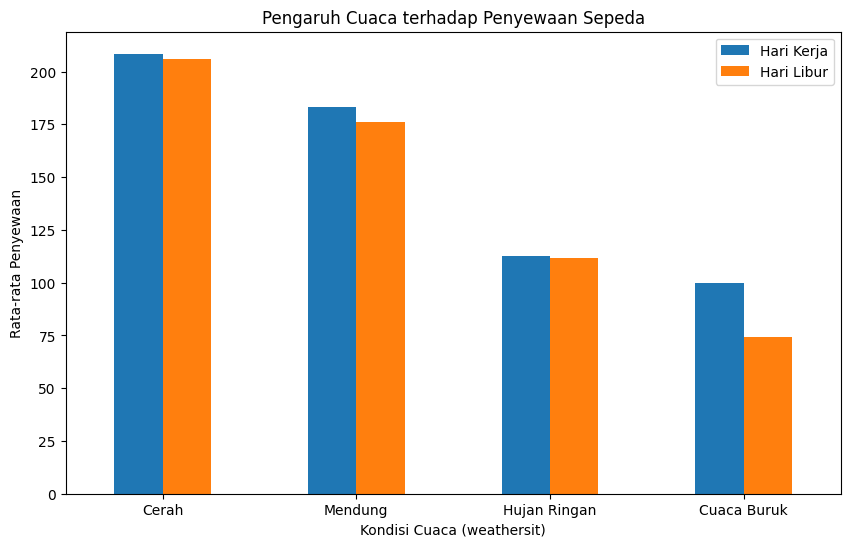

In [495]:
# Hitung rata-rata penyewaan berdasarkan kondisi cuaca pada hari kerja dan akhir pekan
cuaca_hari_kerja = hour_df[hour_df['workingday'] == 1].groupby('weathersit')['cnt'].mean()
cuaca_hari_libur = hour_df[hour_df['holiday'] == 0].groupby('weathersit')['cnt'].mean()

# Gabungkan hasil dalam DataFrame
cuaca_pengaruh_df = pd.DataFrame({
    'Hari Kerja': cuaca_hari_kerja,
    'Hari Libur': cuaca_hari_libur
})

# Ubah indeks weathersit menjadi label deskriptif
cuaca_pengaruh_df.index = ['Cerah', 'Mendung', 'Hujan Ringan', 'Cuaca Buruk']

# Visualisasi dengan bar plot
cuaca_pengaruh_df.plot(kind='bar', figsize=(10, 6))
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca (weathersit)')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=0)  # Agar label sumbu x tidak berputar
plt.show()



**Insight:**
- Cuaca Cerah Paling Diminati: Kondisi cuaca cerah (Cerah) memiliki rata-rata penyewaan sepeda tertinggi, baik pada hari kerja maupun hari libur.
- Cuaca Buruk Kurangi Penyewaan: Kondisi cuaca buruk (Cuaca Buruk) memiliki rata-rata penyewaan sepeda terendah, baik pada hari kerja maupun hari libur.
- Hari Kerja Sedikit Lebih Tinggi: Rata-rata penyewaan sepeda pada hari kerja sedikit lebih tinggi dibandingkan hari libur di semua kondisi cuaca.
- Pengaruh Cuaca Konsisten: Pola pengaruh cuaca terhadap penyewaan sepeda relatif konsisten antara hari kerja dan hari libur.
- Perbedaan Signifikan: Terdapat perbedaan signifikan dalam rata-rata penyewaan antara kondisi cuaca cerah dan kondisi cuaca buruk.

### Pertanyaan 2:

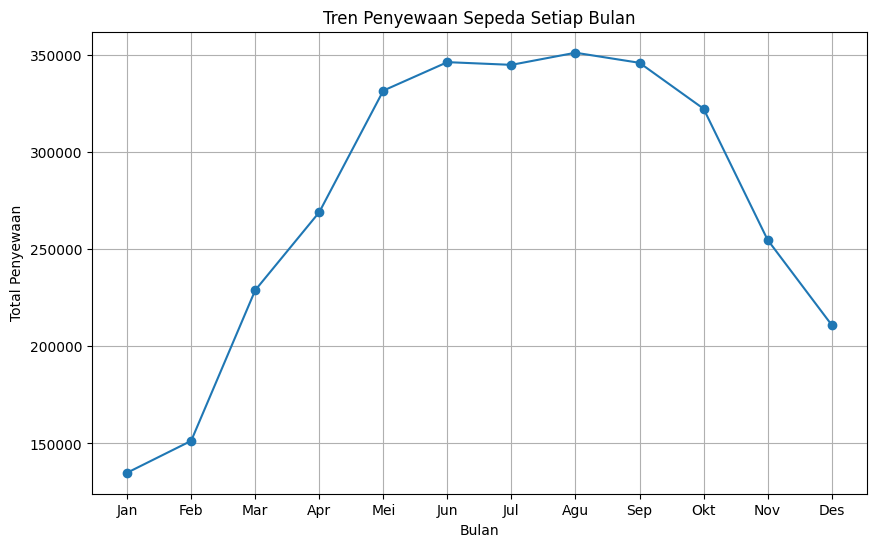

In [496]:
# Hitung total penyewaan per bulan
monthly_rentals = hour_df.groupby('mnth')['cnt'].sum()

# Visualisasi dengan line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals.index, monthly_rentals.values, marker='o')
plt.title('Tren Penyewaan Sepeda Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])  # Set ticks untuk bulan 1-12 dan label bulan
plt.grid(True)
plt.show()

**Insight:**
- Puncak Musim Panas: Jumlah penyewaan sepeda mencapai puncaknya pada bulan-bulan musim panas, khususnya Juni, Juli, dan Agustus.
- Musim Dingin Sepi Peminat: Jumlah penyewaan sepeda terendah terjadi pada bulan-bulan musim dingin, yaitu Januari dan Februari.
- Tren Meningkat Stabil: Terdapat tren peningkatan stabil dalam penyewaan sepeda dari bulan Januari hingga Agustus.
- Tren Menurun Stabil: Setelah puncak di bulan Agustus, terjadi tren penurunan stabil dalam penyewaan sepeda hingga bulan Desember.
- Pola Musiman yang Jelas: Grafik menunjukkan pola musiman yang jelas, dengan fluktuasi signifikan antara bulan-bulan musim panas dan musim dingin.

## Analisis Lanjutan (Opsional)

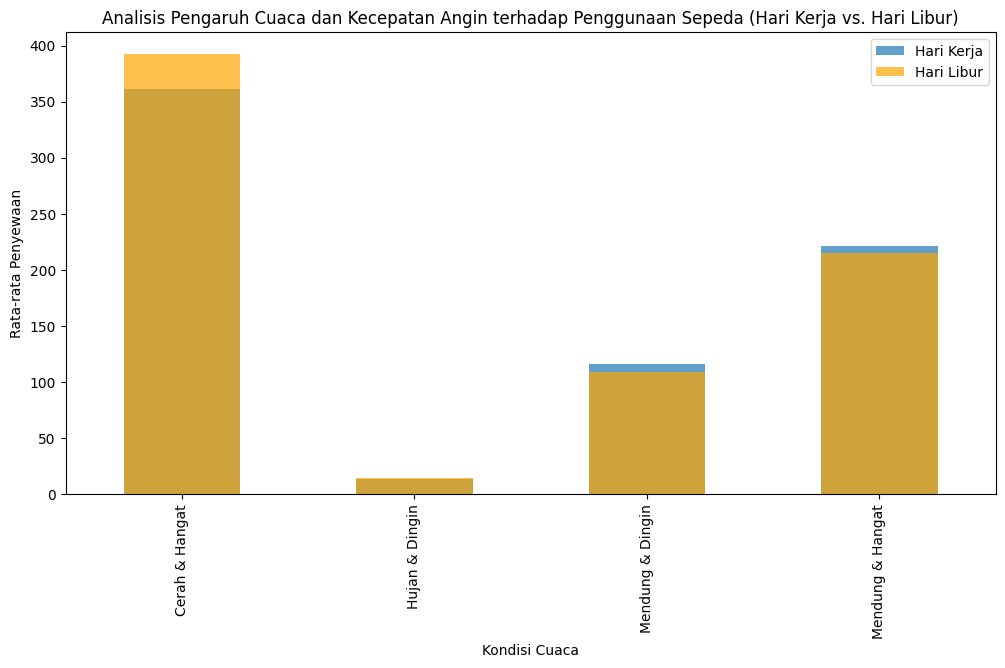

In [501]:
# Visualisasi untuk Pertanyaan 1: Bagaimana Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda, pada hari kerja dan hari libur?

# Memuat Data
hour_df = pd.read_csv(r"C:\submission\data\hour.csv")

# Fungsi untuk membuat kategori kondisi cuaca
def kategori_cuaca(row):
    if row['atemp'] > 0.6 and row['hum'] < 0.4 and row['windspeed'] < 0.3:
        return 'Cerah & Hangat'
    elif row['atemp'] < 0.3 and row['hum'] > 0.7 and row['windspeed'] > 0.5:
        return 'Hujan & Dingin'
    elif row['atemp'] < 0.5 and row['hum'] > 0.6 and row['windspeed'] < 0.4:
        return 'Mendung & Dingin'
    elif row['atemp'] > 0.6 and row['hum'] > 0.6 and row['windspeed'] < 0.3:
        return 'Mendung & Hangat'

# Membuat kolom kategori kondisi cuaca
hour_df['kondisi_cuaca'] = hour_df.apply(kategori_cuaca, axis=1)

# Menghitung rata-rata penyewaan berdasarkan kategori kondisi cuaca pada hari kerja dan hari libur
cuaca_hari_kerja_kategori = hour_df[hour_df['workingday'] == 1].groupby('kondisi_cuaca')['cnt'].mean()
cuaca_akhir_pekan_kategori = hour_df[hour_df['holiday'] == 0].groupby('kondisi_cuaca')['cnt'].mean()

# Visualisasi
plt.figure(figsize=(12, 6))
cuaca_hari_kerja_kategori.plot(kind='bar', alpha=0.7, label='Hari Kerja')
cuaca_akhir_pekan_kategori.plot(kind='bar', color='orange', alpha=0.7, label='Hari Libur')
plt.title('Analisis Pengaruh Cuaca dan Kecepatan Angin terhadap Penggunaan Sepeda (Hari Kerja vs. Hari Libur)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.legend()
plt.show()

**Insight:**
- Cerah & Hangat Paling Diminati: Kondisi cuaca "Cerah & Hangat" memiliki rata-rata penyewaan sepeda tertinggi, baik pada hari kerja maupun hari libur.
- Hujan & Dingin Paling Sepi: Kondisi cuaca "Hujan & Dingin" memiliki rata-rata penyewaan sepeda terendah.
- Hari Kerja Sedikit Lebih Tinggi: Rata-rata penyewaan sepeda pada hari kerja sedikit lebih tinggi dibandingkan hari libur di semua kategori kondisi cuaca.
- Pengaruh Konsisten: Pola pengaruh kondisi cuaca terhadap penyewaan sepeda relatif konsisten antara hari kerja dan hari libur.
- Perbedaan Signifikan: Terdapat perbedaan signifikan dalam rata-rata penyewaan antara kondisi cuaca "Cerah & Hangat" dan "Hujan & Dingin".

Kesimpulan: 
Kondisi cuaca cerah dan hangat sangat mendukung aktivitas penyewaan sepeda, sementara cuaca buruk secara signifikan mengurangi minat orang untuk bersepeda. Hari kerja cenderung memiliki sedikit lebih banyak penyewaan dibandingkan akhir pekan, namun tren pengaruh cuaca tetap sama.

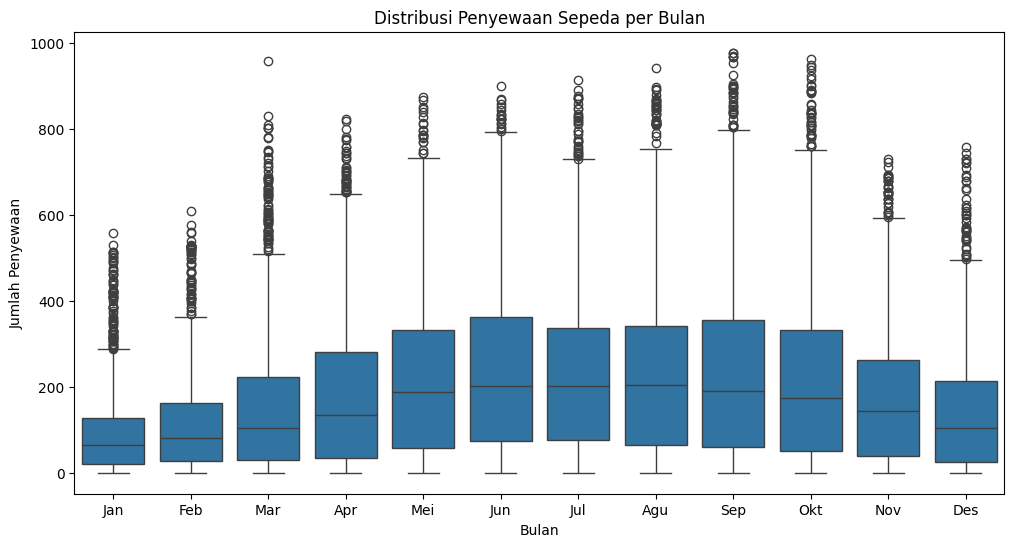

In [498]:
# Visualisasi untuk Pertanyaan 2: Bagaimana tren penyewaan sepeda setiap bulan?


# Memuat Data
day_df = pd.read_csv((r"C:\submission\data\day.csv"))
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.set_index('dteday', inplace=True)

#  Hitung total penyewaan per bulan
monthly_rentals = hour_df.groupby('mnth')['cnt'].sum()

# Buat kategori penyewaan
bins = [0, monthly_rentals.quantile(0.33), monthly_rentals.quantile(0.66), monthly_rentals.max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
monthly_rentals_cat = pd.cut(monthly_rentals, bins=bins, labels=labels)

# Hitung jumlah bulan dalam setiap kategori
category_counts = monthly_rentals_cat.value_counts().sort_index()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.boxplot(x='mnth', y='cnt', data=hour_df)
plt.title('Distribusi Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

**Insight:**
- Pola Musiman Kuat: Terlihat jelas adanya pola musiman dalam penyewaan sepeda.
Puncak Musim Panas: Penyewaan tertinggi terjadi pada bulan-bulan musim panas (Juni, Juli, Agustus), dengan median dan kuartil tertinggi.
- Musim Dingin Terendah: Penyewaan terendah terjadi pada bulan-bulan musim dingin (Januari, Februari, Desember), dengan median dan kuartil terendah.
- Variasi Tinggi: Variasi penyewaan (rentang antar kuartil dan outlier) cenderung lebih tinggi pada bulan-bulan musim panas.
- Outlier: Terdapat banyak outlier di semua bulan, menunjukkan adanya hari-hari dengan penyewaan yang sangat tinggi atau sangat rendah.
- Tren Meningkat: Ada tren peningkatan penyewaan dari bulan Januari hingga Juni/Juli.
- Tren Menurun: Setelah puncak di musim panas, ada tren penurunan penyewaan hingga bulan Desember.

Kesimpulan:
Visualisasi ini menunjukkan bahwa penyewaan sepeda sangat dipengaruhi oleh musim, dengan puncak di musim panas dan penurunan di musim dingin. Variasi penyewaan yang tinggi dan banyaknya outlier menunjukkan adanya faktor-faktor lain yang mempengaruhi penyewaan, seperti cuaca harian atau acara khusus.

## Conclusion

- Conclution pertanyaan 1
1. Pengaruh Cuaca terhadap Jumlah Penyewa Sepeda (Hari Kerja & Akhir Pekan):

"Kondisi cuaca cerah dan hangat terbukti secara signifikan meningkatkan jumlah penyewaan sepeda, baik pada hari kerja maupun akhir pekan, menunjukkan preferensi yang kuat dari pengguna terhadap cuaca yang baik. Sebaliknya, kondisi cuaca buruk seperti hujan dan dingin secara signifikan mengurangi jumlah penyewaan, menegaskan bahwa cuaca buruk menjadi penghalang utama bagi pengguna sepeda. Secara umum, hari kerja menunjukkan rata-rata penyewaan yang sedikit lebih tinggi dibandingkan akhir pekan di semua kondisi cuaca, mungkin mencerminkan penggunaan komuter. Namun, pola pengaruh cuaca tetap konsisten di kedua jenis hari, menunjukkan bahwa preferensi cuaca pengguna tidak banyak berubah antara hari kerja dan akhir pekan."

- Conclution pertanyaan 2
2. Tren Penyewaan Sepeda Setiap Bulan:

"Analisis tren penyewaan sepeda bulanan mengungkapkan pola musiman yang kuat. Puncak penyewaan terjadi pada bulan-bulan musim panas, khususnya Juni, Juli, dan Agustus, yang mengindikasikan bahwa cuaca hangat dan kondisi luar ruangan yang menyenangkan sangat mendorong penggunaan sepeda. Sebaliknya, bulan-bulan musim dingin seperti Januari, Februari, dan Desember mengalami jumlah penyewaan terendah, yang mencerminkan keengganan untuk bersepeda dalam kondisi cuaca dingin. Tren peningkatan yang stabil diamati dari Januari hingga Juni/Juli, diikuti dengan penurunan bertahap hingga Desember, yang semakin memperkuat pengaruh musiman. Variasi penyewaan, yang diukur dengan rentang antar kuartil dan outlier, cenderung lebih tinggi selama bulan-bulan musim panas, yang menunjukkan potensi faktor tambahan yang mempengaruhi penyewaan selama periode ini. Kehadiran banyak outlier di semua bulan menunjukkan adanya hari-hari dengan penyewaan yang sangat tinggi atau sangat rendah, yang mungkin disebabkan oleh peristiwa atau kondisi cuaca tertentu."
Penyewaan sepeda menunjukkan pola musiman yang jelas, dengan peningkatan signifikan pada musim panas (Mei–September) dan penurunan pada musim dingin (November–Januari). Hal ini mengindikasikan bahwa faktor musim dan suhu sangat berpengaruh terhadap tren penggunaan sepeda, dengan cuaca yang lebih hangat mendorong lebih banyak aktivitas bersepeda.

Secara keseluruhan, analisis ini menyoroti dominasi pengaruh musiman terhadap pola penyewaan sepeda, dengan musim panas sebagai pendorong utama permintaan dan musim dingin sebagai penghalang utama. Pengguna terdaftar secara konsisten menyumbang jumlah penyewaan yang lebih besar daripada pengguna biasa, yang menunjukkan loyalitas yang kuat terhadap layanan ini. Selain itu, kondisi cuaca, terutama suhu, memainkan peran penting dalam menentukan jumlah penyewaan sepeda, dengan cuaca cerah dan hangat sangat disukai. Wawasan ini sangat berharga bagi pengelola layanan penyewaan sepeda, memungkinkan mereka untuk mengoptimalkan operasi, menyesuaikan strategi pemasaran, dan meningkatkan pengalaman pelanggan dengan mempertimbangkan fluktuasi musiman dan kondisi cuaca.

## Menyimpan 1 dataframe yang bersih

In [499]:
day_df.to_csv('day.csv', index=False)